In [61]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Linear regression

In [51]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


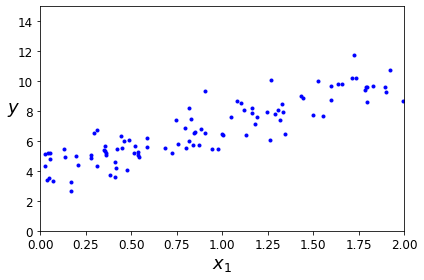

In [52]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [53]:
X_b=np.c_[np.ones((100,1)),X]

In [54]:
X_b.T

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.  

In [55]:
theta=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [56]:
theta

array([[3.94691721],
       [3.15288769]])

In [57]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X,y)

LinearRegression()

In [58]:
linreg.intercept_

array([3.94691721])

In [59]:
linreg.coef_

array([[3.15288769]])

In [60]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [61]:
linreg.predict(X_new)

array([[ 3.94691721],
       [10.25269258]])

In [62]:
np.linalg.pinv(X_b).dot(y)

array([[3.94691721],
       [3.15288769]])

In [63]:
np.linalg.lstsq(X_b,y,rcond=1e-6)

(array([[3.94691721],
        [3.15288769]]),
 array([86.42902314]),
 2,
 array([13.8471973 ,  4.06084018]))

In [64]:
np.array([[1,2,3],[3,4,5]]).T

array([[1, 3],
       [2, 4],
       [3, 5]])

In [65]:
X_x=np.c_[np.ones((100,1)),np.random.rand(100,1)]

In [66]:
Xi=X_x.T.dot(X_x)

In [67]:
Xi

array([[100.        ,  53.54558935],
       [ 53.54558935,  37.4725329 ]])

In [68]:
Xii=np.linalg.inv(Xi)
Xii

array([[ 0.04257647, -0.06083875],
       [-0.06083875,  0.11362046]])

In [69]:
Xiii=Xii.dot(X_x.T)
Xiii

array([[-0.01057696, -0.01729394, -0.00416433,  0.01716006,  0.01694163,
        -0.00229712,  0.02804956,  0.03585536,  0.0210017 ,  0.02510121,
         0.02454945,  0.02836406,  0.04001557,  0.04148904, -0.01751533,
         0.01655128,  0.01919451,  0.00122758,  0.02929817, -0.01521798,
        -0.00526378,  0.03713681,  0.01717137, -0.01090799, -0.01489985,
         0.01414034,  0.00525729,  0.03241433, -0.01772499,  0.02848185,
        -0.01477815,  0.00305278,  0.00560252,  0.01138514,  0.0285428 ,
         0.03183672,  0.02916236,  0.0312338 , -0.00485248,  0.02127528,
         0.03905739, -0.01638252, -0.01119196, -0.01386682, -0.01795248,
         0.0319969 ,  0.0184696 , -0.00355381,  0.00023144,  0.03321363,
        -0.0070578 ,  0.02892178,  0.02895968,  0.00990761,  0.00650274,
         0.00728475,  0.03701052, -0.01080715,  0.02641769,  0.03469694,
        -0.01149385, -0.01556417, -0.0098743 , -0.00667348,  0.00271236,
         0.00906299,  0.0372843 ,  0.01772668,  0.0

In [70]:
Xiii.dot(y)

array([[6.25298806],
       [0.84725033]])

## Batch gradient descent

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
X_b=np.c_[np.ones((100,1)),X]

In [3]:
eta=0.1
m=len(X_b)
iterations=1000
theta = np.random.randn(2,1) 
for i in range(iterations):
    gradient=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradient

In [4]:
theta

array([[4.18841593],
       [2.89913183]])

In [5]:
#from normal eqn
theta1=np.linalg.pinv(X_b).dot(y)

In [6]:
theta1

array([[4.18841593],
       [2.89913183]])

## Stochastic gradient descent

In [7]:
epochs=50
t0,t1=5,50
m=len(X_b)
theta=np.random.randn(2,1)
def learning_schedule(t):
    return t0/(t+t1)
for epoch in range(epochs):
    for i in range(m):
        ri=np.random.randint(m)#random index
        xi=X_b[ri:ri+1]
        yi=y[ri:ri+1]
        gradient=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m + i)
        theta=theta-eta*gradient

In [8]:
theta

array([[4.1993522 ],
       [2.91964589]])

In [9]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [10]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.19733155]), array([2.8853527]))

## polynomial regression


In [3]:
import numpy as np
m=100
X=6 * np.random.rand(m, 1) - 3
y= 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [4]:
X

array([[ 1.08310393],
       [-1.3897322 ],
       [-0.89701712],
       [-1.47240307],
       [-1.09416312],
       [ 2.53927416],
       [ 0.46320565],
       [-1.13231255],
       [-0.53754522],
       [-0.10249998],
       [-1.57764211],
       [ 2.42067055],
       [-0.8983771 ],
       [-0.85686163],
       [ 0.34466437],
       [ 0.4032819 ],
       [ 1.2806337 ],
       [ 0.8033603 ],
       [ 2.9769279 ],
       [ 2.96957153],
       [-2.88186058],
       [-2.0525091 ],
       [ 1.55406838],
       [-1.74003605],
       [ 1.59955455],
       [ 2.55488475],
       [ 1.30053883],
       [-1.63166057],
       [-0.69931409],
       [ 2.1512802 ],
       [-2.8802971 ],
       [ 1.26353975],
       [ 1.60087147],
       [-1.4601772 ],
       [ 2.33649697],
       [-0.09046762],
       [ 1.75598065],
       [-2.30781393],
       [ 1.30784881],
       [-1.21990859],
       [-0.08588269],
       [-0.9438974 ],
       [-1.97271315],
       [-1.64586464],
       [-1.61278974],
       [ 0

In [5]:
y

array([[ 3.65982556],
       [ 1.01633019],
       [ 0.79249566],
       [ 1.02304924],
       [ 1.88116846],
       [ 7.63842222],
       [ 1.18082606],
       [ 1.39363957],
       [ 0.0171636 ],
       [ 0.78478554],
       [ 1.08692101],
       [ 7.75500891],
       [ 3.40465061],
       [-0.20187756],
       [ 0.27537906],
       [ 3.58288906],
       [ 3.98242714],
       [ 1.96455103],
       [ 8.71747357],
       [ 8.28438865],
       [ 2.29490182],
       [ 2.51966779],
       [ 3.91677346],
       [ 2.4822526 ],
       [ 4.87079511],
       [ 7.95828688],
       [ 5.18010597],
       [ 3.59727295],
       [ 1.26113579],
       [ 4.70614442],
       [ 5.59253921],
       [ 4.91624595],
       [ 4.88313845],
       [ 1.4059509 ],
       [ 7.12607557],
       [ 3.63165206],
       [ 3.20443796],
       [ 2.69731272],
       [ 5.42208039],
       [ 1.46671001],
       [ 1.12974785],
       [ 1.24117441],
       [ 1.75735087],
       [ 3.13326758],
       [ 0.79445348],
       [ 2

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly.fit_transform(X)

In [11]:
X_poly[1]

array([-1.3897322 ,  1.93135559])

In [12]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [13]:
linreg.fit(X_poly,y)

LinearRegression()

In [14]:
linreg.coef_

array([[0.93560884, 0.54741093]])

In [15]:
linreg.intercept_

array([1.76082223])

In [16]:
x1=6 * np.random.rand(m, 1) - 3
x2=4* np.random.rand(m, 1) - 3

In [24]:
Xn=np.concatenate((x1,x2),axis=1)

In [25]:
Xn

array([[-2.8474457 , -0.57574676],
       [-2.96499254, -0.62204975],
       [ 2.11076427, -1.25820536],
       [-1.22784138, -0.19205517],
       [-0.55288918, -1.0065793 ],
       [ 1.52535745, -0.6396449 ],
       [-0.33072201,  0.13892571],
       [ 1.88972972, -0.12912386],
       [-1.20823207, -1.1468866 ],
       [ 1.96372476, -1.41711707],
       [-2.46924251, -2.98775282],
       [ 1.05519717, -2.23522424],
       [ 2.00521507, -2.38996928],
       [-0.86506147,  0.97641474],
       [-1.47127932, -1.96799356],
       [ 0.405985  , -1.70455818],
       [ 1.43716277, -0.6845559 ],
       [ 0.28267782, -0.44002393],
       [ 2.75667326, -0.72369151],
       [ 0.77432002, -0.64158945],
       [ 0.80683811, -2.38376848],
       [ 2.70635003,  0.97284902],
       [ 2.41160064, -1.44407491],
       [ 0.90955777,  0.05831481],
       [-1.43923636, -0.76289561],
       [ 1.43990784, -0.47845291],
       [ 1.25348805,  0.13234915],
       [-1.87091532, -2.58373151],
       [-2.06674748,

In [26]:
polyn=PolynomialFeatures(degree=3)
Xnn=polyn.fit_transform(Xn)

In [28]:
Xnn[0]

array([  1.        ,  -2.8474457 ,  -0.57574676,   8.10794701,
         1.63940763,   0.33148433, -23.08693884,  -4.66812421,
        -0.94388363,  -0.19085103])

In [32]:
polyn1=PolynomialFeatures(degree=3,include_bias=False)
Xnn1=polyn1.fit_transform(Xn)

In [33]:
Xnn1[0]

array([ -2.8474457 ,  -0.57574676,   8.10794701,   1.63940763,
         0.33148433, -23.08693884,  -4.66812421,  -0.94388363,
        -0.19085103])

### learning curves

In [1]:
#plot of , model performance on training set and test set vs different sized train set

In [8]:
import numpy as np
m=100
X=6 * np.random.rand(m, 1) - 3
y= 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [9]:
#first we take a linear model

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [14]:
def learning_curve(model,x,y):
    X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
    trainerror,testerror=[],[]
    for i in range(len(X_train)):
        model.fit(X_train[:i+1],y_train[:i+1])
        y_train_predict=model.predict(X_train[:i+1])
        y_test_predict=model.predict(X_test)
        trainerror.append(mse(y_train[:i+1],y_train_predict))
        testerror.append(mse(y_test,y_test_predict))
    plt.plot(np.sqrt(trainerror), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(testerror), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)

Saving figure underfitting_learning_curves_plot


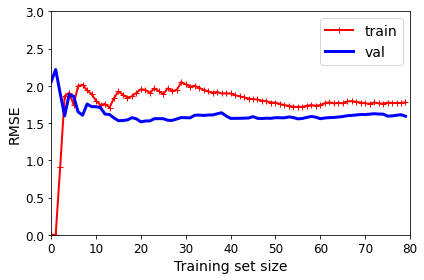

In [15]:
linreg=LinearRegression()
learning_curve(linreg,X,y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()  

Saving figure learning_curves_plot


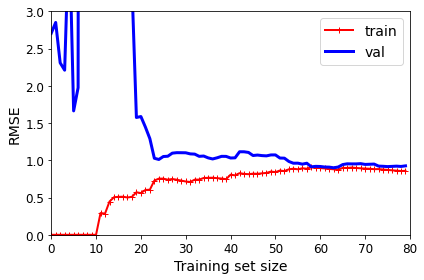

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

learning_curve(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
save_fig("learning_curves_plot") 
plt.show()    

[Pipeline] ..... (step 1 of 2) Processing poly_features, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing lin_reg, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing poly_features, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing lin_reg, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing poly_features, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing lin_reg, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing poly_features, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing lin_reg, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing poly_features, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing lin_reg, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing poly_features, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing lin_reg, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing poly_features, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing lin_reg, total=   0.0s
[Pipel

[Pipeline] ........... (step 2 of 2) Processing lin_reg, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing poly_features, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing lin_reg, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing poly_features, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing lin_reg, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing poly_features, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing lin_reg, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing poly_features, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing lin_reg, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing poly_features, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing lin_reg, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing poly_features, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing lin_reg, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing poly_features, total=   0.0s
[Pipel

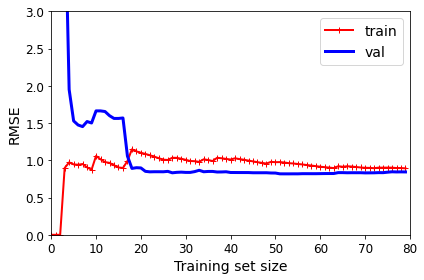

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ],verbose=True)

learning_curve(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
save_fig("learning_curves_plot") 
plt.show()  

In [24]:
polynomial_regression.get_params()

{'memory': None,
 'steps': [('poly_features', PolynomialFeatures(include_bias=False)),
  ('lin_reg', LinearRegression())],
 'verbose': True,
 'poly_features': PolynomialFeatures(include_bias=False),
 'lin_reg': LinearRegression(),
 'poly_features__degree': 2,
 'poly_features__include_bias': False,
 'poly_features__interaction_only': False,
 'poly_features__order': 'C',
 'lin_reg__copy_X': True,
 'lin_reg__fit_intercept': True,
 'lin_reg__n_jobs': None,
 'lin_reg__positive': False}

In [25]:
polynomial_regression.named_steps

{'poly_features': PolynomialFeatures(include_bias=False),
 'lin_reg': LinearRegression()}

### regularised linear models

In [1]:
#ridge regression - regularization term--> half the square of l2 norm of theta

In [10]:
#using normal  eqn
import numpy as np
m=100
X=6 * np.random.rand(m, 1) - 3
y= 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [11]:
from sklearn.linear_model import Ridge
red= Ridge(alpha=1,solver='cholesky')

In [12]:
red.fit(X,y)

Ridge(alpha=1, solver='cholesky')

In [13]:
red.predict([[1.5]])

array([[4.9766332]])

In [14]:
#using stochastic gradient descent
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(penalty='l2')

In [15]:
sgd.fit(X,y.ravel())

SGDRegressor()

In [16]:
sgd.predict([[1.5]])

array([4.95916294])

In [19]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.1)

In [20]:
ls.fit(X,y)

Lasso(alpha=0.1)

In [21]:
ls.predict([[1.5]])

array([4.93278543])

In [22]:
from sklearn.linear_model import ElasticNet
en=ElasticNet(alpha=0.1,l1_ratio=0.5)

In [23]:
en.fit(X,y)

ElasticNet(alpha=0.1)

In [24]:
en.predict([[1.5]])

array([4.93493582])

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
polyfeat=PolynomialFeatures(degree=2,include_bias=False)

In [26]:
Xpol=polyfeat.fit_transform(X)

In [28]:
Xpol[0]

array([-2.55629629,  6.5346507 ])

In [29]:
linreg=LinearRegression()
linreg.fit(Xpol,y)

LinearRegression()

In [33]:
linreg.intercept_

array([1.90924193])

In [34]:
linreg.coef_

array([[1.05558497, 0.51787839]])

In [35]:
linreg.predict([[1.5,2.25]])

array([[4.65784577]])

## Logistic regression

In [36]:
from sklearn.datasets import load_iris
iris=load_iris()

In [39]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [41]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [42]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [43]:
len(iris.target)

150

In [47]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [52]:
X=iris.data[:,3:]#petal length

In [53]:
X[:7]

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3]])

In [57]:
y = (iris["target"] == 2).astype(np.int64)  # 1 if Iris virginica, else 0


In [58]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [59]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=42)

In [60]:
lr.fit(X,y)

LogisticRegression(random_state=42)

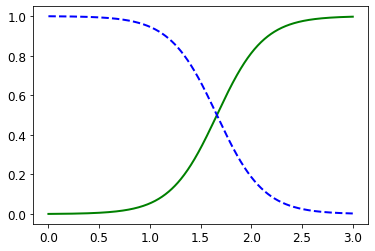

In [63]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = lr.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

In [66]:
X=iris.data[:,2:]#peta length,width

In [67]:
X[:7]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3]])

In [70]:
y=(iris.target == 2)

In [71]:
y

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [74]:
y=y.astype(np.int64)

In [75]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [76]:
log_reg=LogisticRegression(random_state=42)
log_reg.fit(X,y)

LogisticRegression(random_state=42)

In [86]:
log_reg.predict([[5,1.7]])

array([1], dtype=int64)

In [87]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [88]:
softmax_reg.predict_proba([[5, 2]])


array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])